In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')

In [ ]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [ ]:
df.shape

(354, 4)

In [ ]:
df.isnull().sum()

,0
dispatching_base_number,0
date,0
active_vehicles,0
trips,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [ ]:
df.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [ ]:
# covnert the datetime columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour

df['dayofweek'] = df['date'].dt.dayofweek

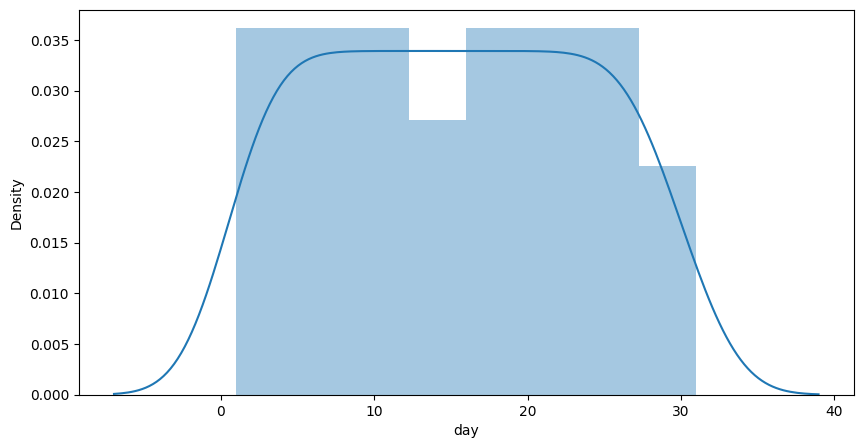

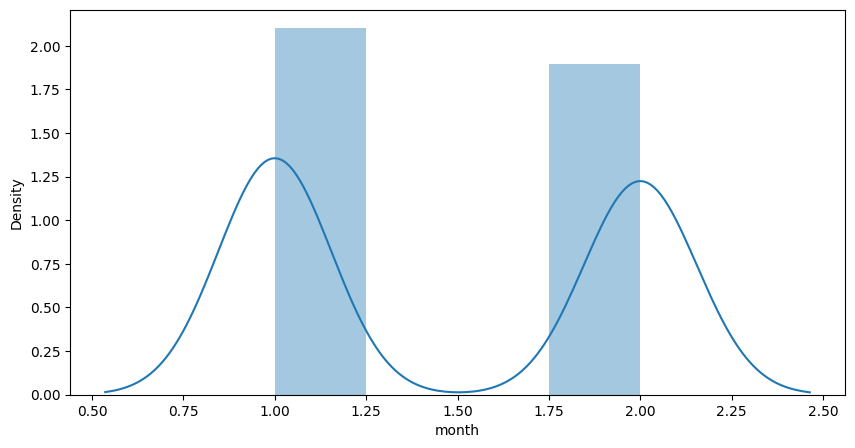

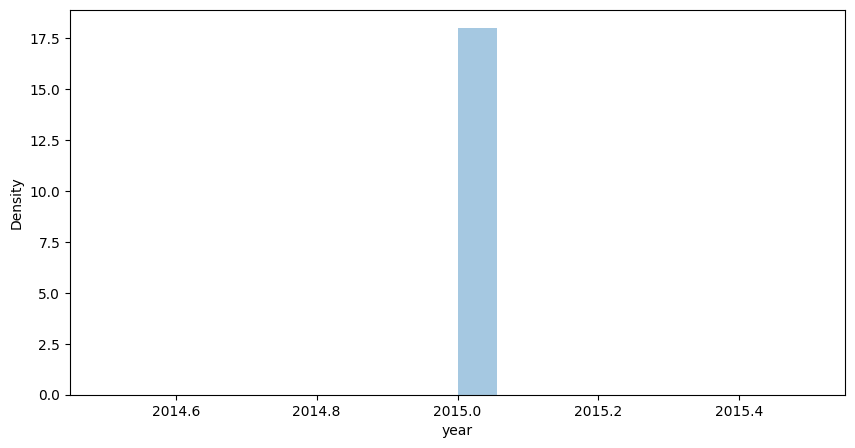

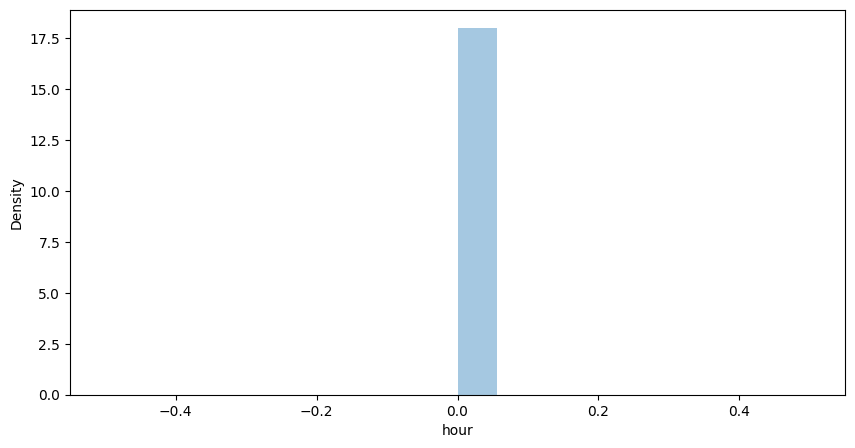

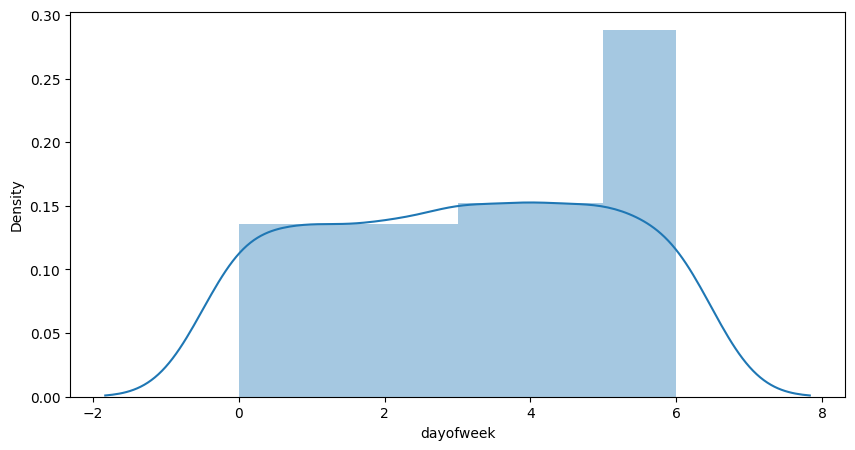

In [ ]:
time = ['day', 'month', 'year', 'hour', 'dayofweek']

for i in time:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.xlabel(i)


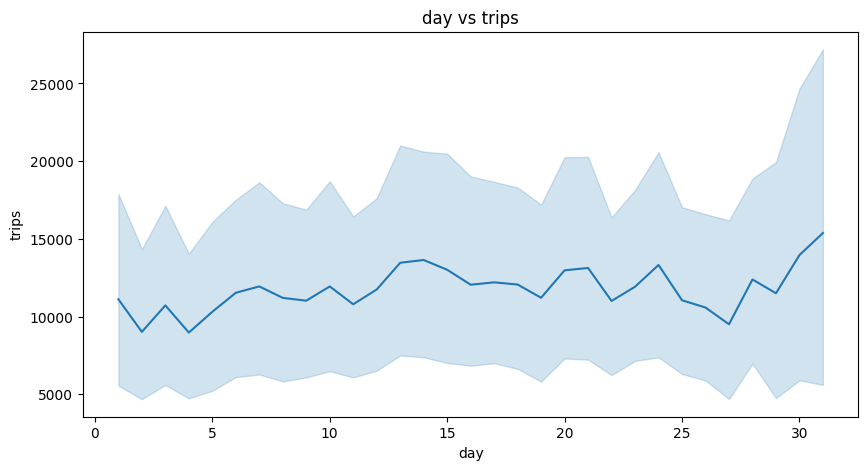

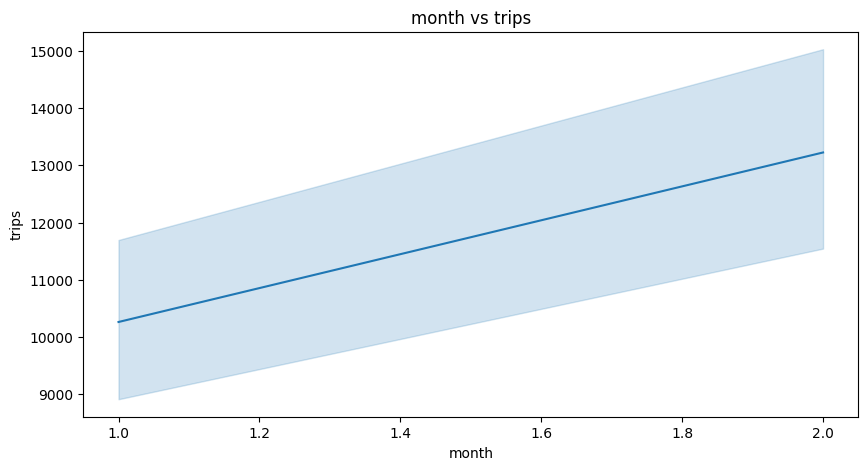

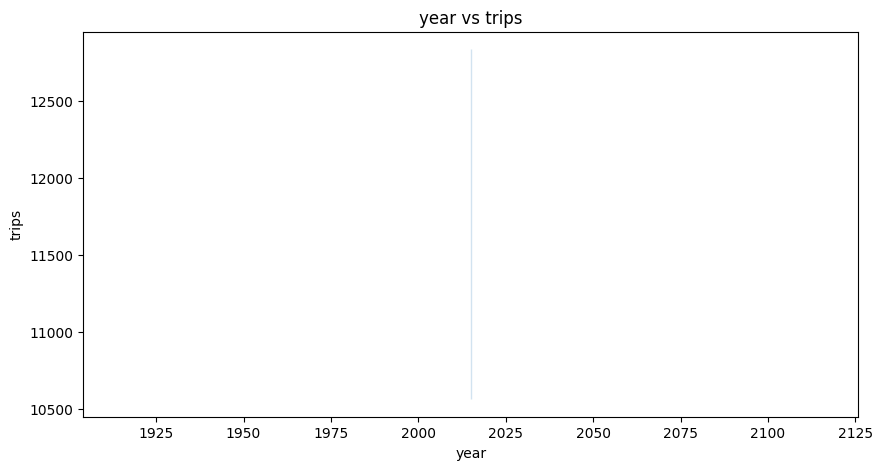

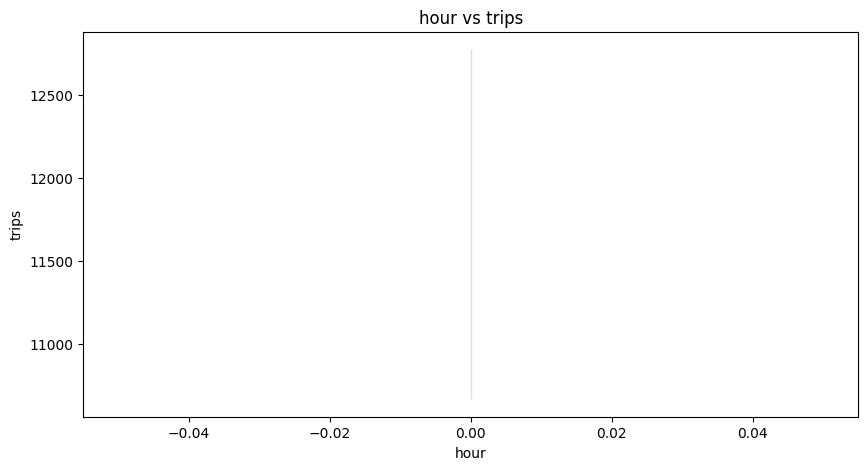

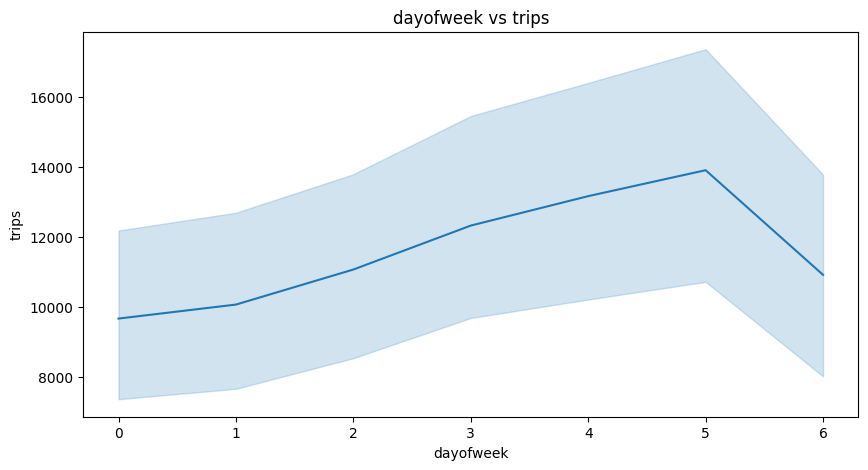

In [ ]:
for i in time:
  plt.figure(figsize=(10,5))
  sns.lineplot(data =df, y='trips',x= df[i])
  plt.title(f'{i} vs trips')
  plt.xlabel(i)
  plt.ylabel('trips')
  plt.show()

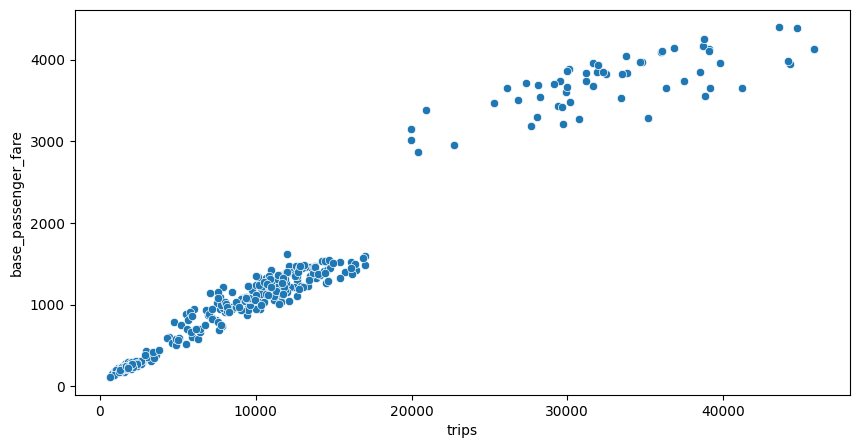

In [ ]:
# relation between have vehicle vs strip
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='trips', y='active_vehicles',palette='viridis')
plt.xlabel('trips')
plt.ylabel('base_passenger_fare')
plt.show()

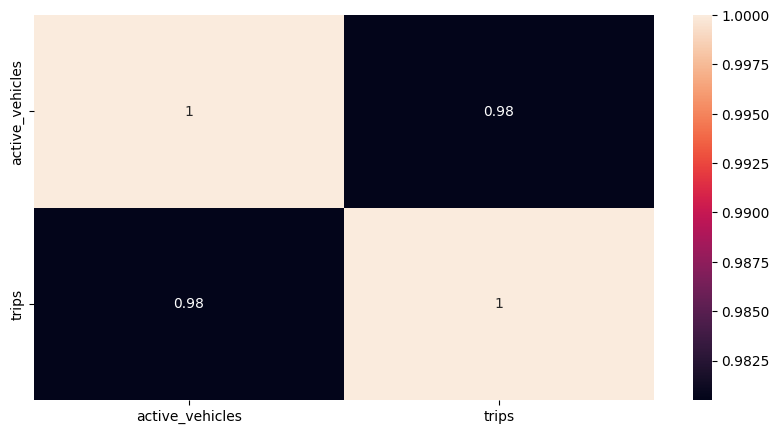

In [ ]:
# heatmap between active vehicle and trips
corr_matrix = df[['active_vehicles', 'trips']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

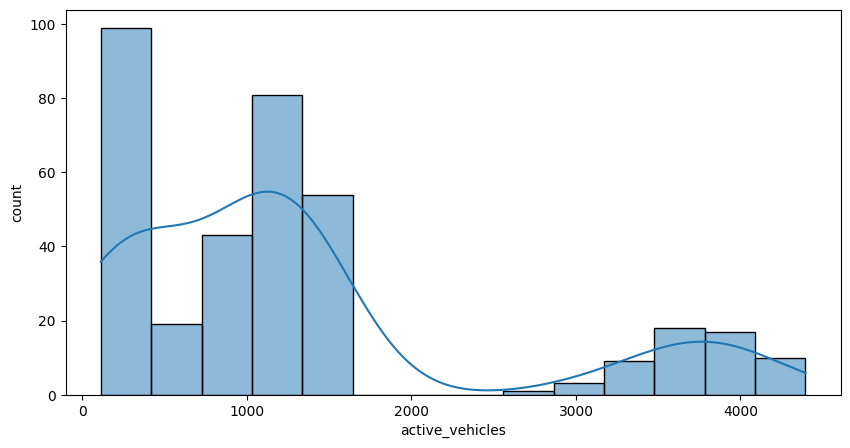

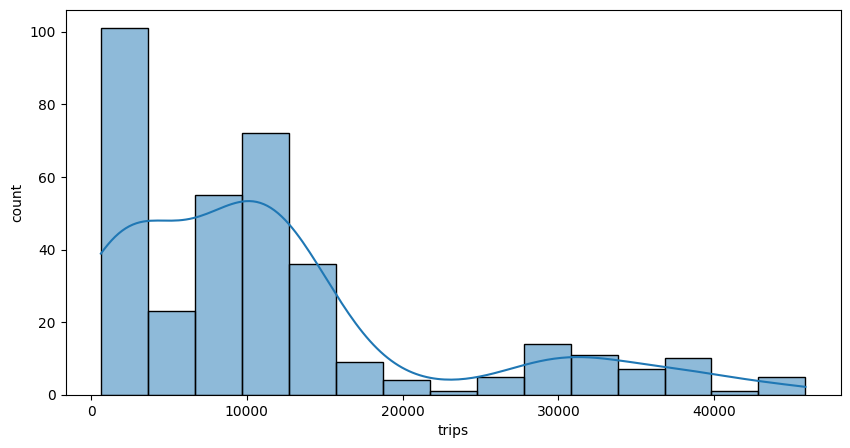

In [ ]:
# count of active vehicle and trip
c =['active_vehicles','trips']
for i in c:
  plt.figure(figsize=(10,5))
  sns.histplot(data=df, x=i,palette='viridis',kde=True )
  plt.xlabel(i)
  plt.ylabel('count')
  plt.show()

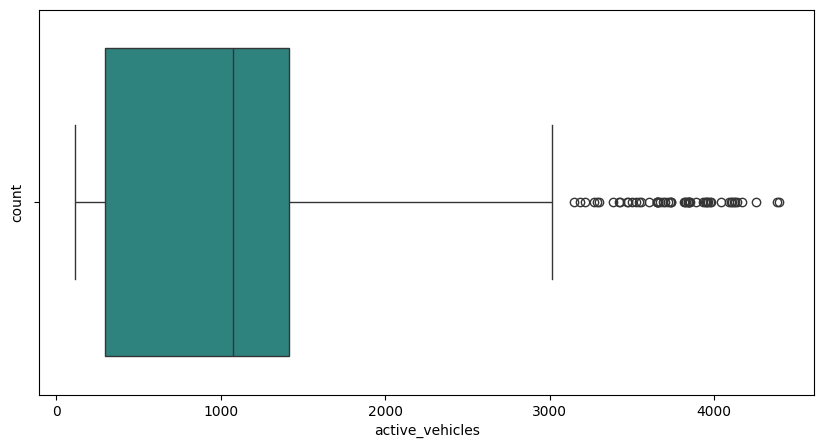

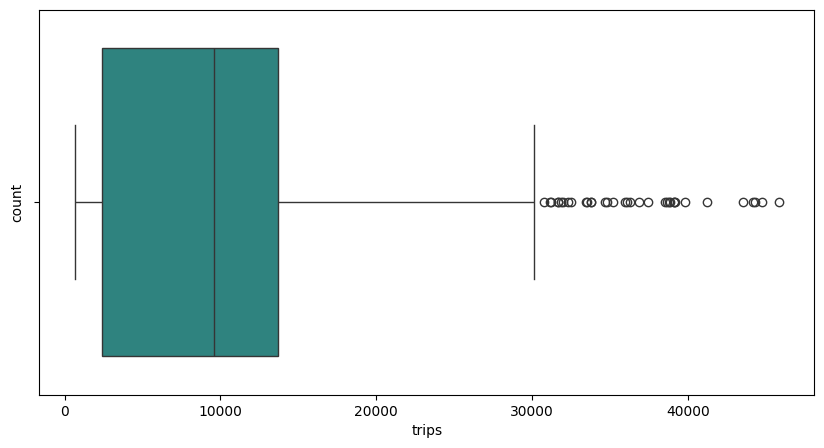

In [ ]:
for i in c:
  plt.figure(figsize=(10,5))
  sns.boxplot(data=df, x=i, palette='viridis')
  plt.xlabel(i)
  plt.ylabel('count')
  plt.show()

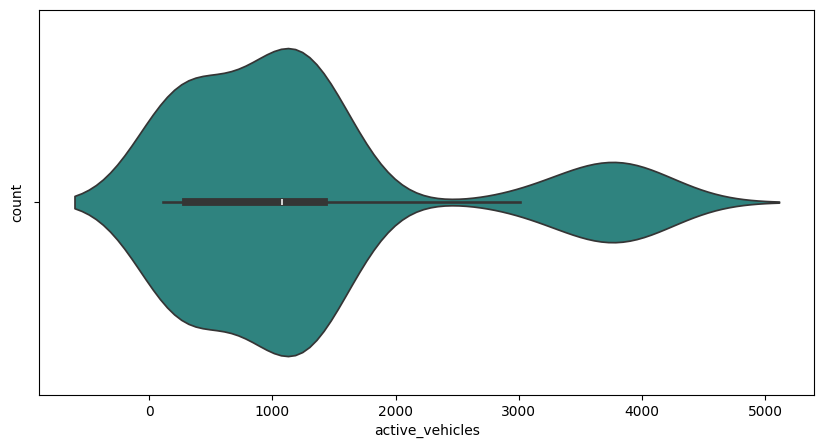

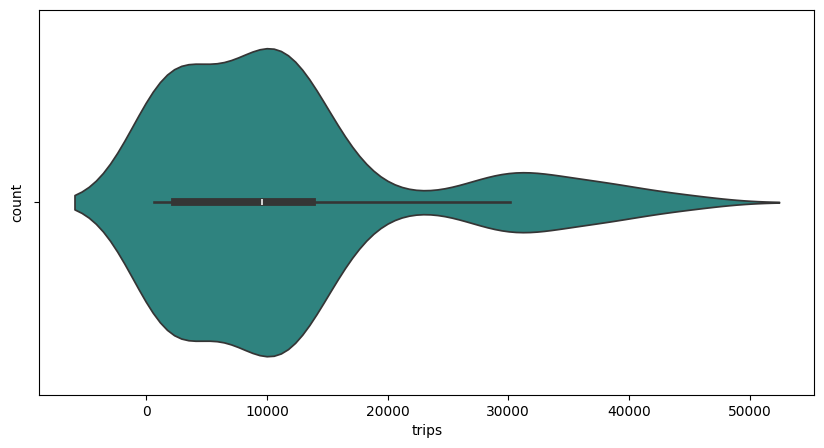

In [ ]:
for i in c:
  plt.figure(figsize=(10,5))
  sns.violinplot(data=df, x=i, palette='viridis')
  plt.xlabel(i)
  plt.ylabel('count')
  plt.show()

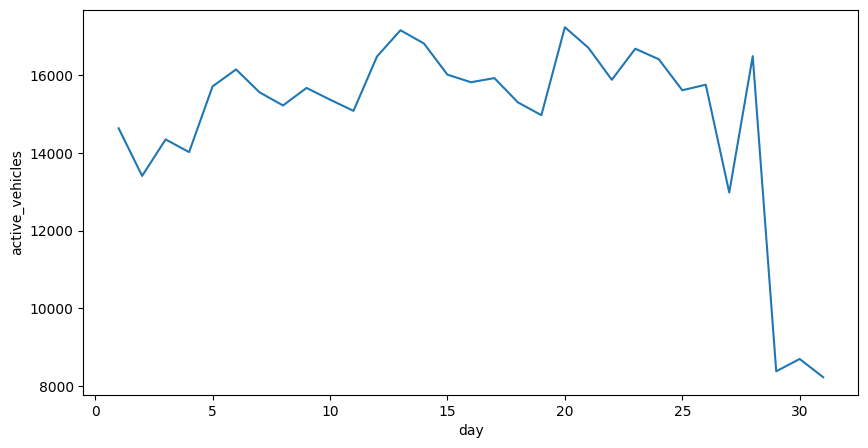

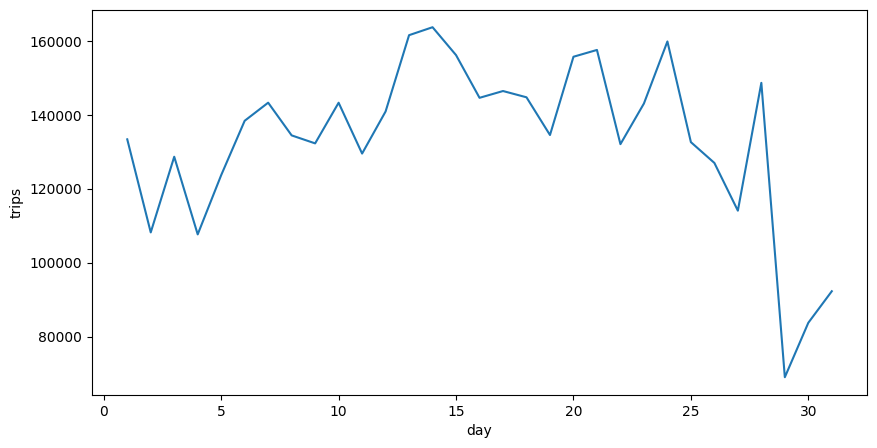

In [ ]:
for i in c:
  daily_count = df.groupby('day')[i].sum().reset_index()
  plt.figure(figsize=(10,5))
  sns.lineplot(data=daily_count, x='day', y=i)
  plt.xlabel('day')
  plt.ylabel(i)
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error ,mean_squared_error ,r2_score


In [ ]:
le = LabelEncoder()
df['dispatching_base_number'] = le.fit_transform(df['dispatching_base_number'])

In [ ]:
# define x and  y
X = df[['dispatching_base_number', 'active_vehicles', 'day', 'month', 'dayofweek']]
y = df['trips']

In [ ]:
# split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# inmport all the model
# 1️⃣ Linear Models
from sklearn.linear_model import (
    LinearRegression,       # Simple & Multiple Linear Regression
    Ridge,                  # L2 Regularization
    Lasso,                  # L1 Regularization
    ElasticNet,             # Combination of L1 & L2
    BayesianRidge,          # Bayesian Linear Regression
    SGDRegressor            # Stochastic Gradient Descent Regressor
)

# 2️⃣ Tree-Based Models
from sklearn.tree import DecisionTreeRegressor

# 3️⃣ Ensemble Models
from sklearn.ensemble import (
    RandomForestRegressor,   # Ensemble of Decision Trees
    GradientBoostingRegressor,  # Boosting Technique
    AdaBoostRegressor,       # Adaptive Boosting
    ExtraTreesRegressor,     # Extremely Randomized Trees
    BaggingRegressor,        # Bagging Ensemble
    HistGradientBoostingRegressor # Fast GBM-like model
)

# 4️⃣ Support Vector Machines
from sklearn.svm import SVR    # Support Vector Regression

# 5️⃣ Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# 6️⃣ Other Advanced Models
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor   # Multi-layer Perceptron (Neural Network)


In [ ]:
# convert the model in dict
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'SGD Regressor': SGDRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Extra Trees Regression': ExtraTreesRegressor(),
    'Bagging Regression': BaggingRegressor(),
    'HistGradientBoosting Regression': HistGradientBoostingRegressor(),
    'SVR Regression': SVR(),
    'KNeighbors Regression': KNeighborsRegressor(),
    'Gaussian Process Regression': GaussianProcessRegressor(),
    'MLP Regression': MLPRegressor()

}

In [ ]:
# train the model using for loop
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}')
  print('-'*100)

Linear Regression - MAE: 1152.84, MSE: 2518128.39, R2: 0.98
----------------------------------------------------------------------------------------------------
Ridge Regression - MAE: 1151.65, MSE: 2514405.10, R2: 0.98
----------------------------------------------------------------------------------------------------
Lasso Regression - MAE: 1152.46, MSE: 2517249.44, R2: 0.98
----------------------------------------------------------------------------------------------------
ElasticNet Regression - MAE: 1178.74, MSE: 2562360.74, R2: 0.98
----------------------------------------------------------------------------------------------------
Bayesian Ridge Regression - MAE: 1146.54, MSE: 2493018.61, R2: 0.98
----------------------------------------------------------------------------------------------------
SGD Regressor - MAE: 632739131668289.25, MSE: 670547166544072924867065806848.00, R2: -6218580149801740926976.00
-------------------------------------------------------------------------

In [ ]:
# best model is gradient boosting
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)
y_pred = gr.predict(X_test)

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R2: {r2_score(y_test, y_pred):.2f}')

MAE: 788.98
MSE: 1308270.80
R2: 0.99


In [ ]:
# save the model
import joblib
joblib.dump(gr, 'uber_model.pkl')

['uber_model.pkl']

In [ ]:
# test with the sample data
sample_data = pd.DataFrame({
    'dispatching_base_number': ['B02764', 'B02617', 'B02512', 'B02765', 'B02682'],
    'active_vehicles': [3200, 1200, 250, 210, 950],
    'day': [8, 9, 10, 11, 12],
    'month': [1, 1, 1, 1, 1],
    'dayofweek': [3, 4, 5, 6, 0]
})

In [ ]:
# label the dispatching base number
sample_data['dispatching_base_number'] = le.transform(sample_data['dispatching_base_number'])

In [ ]:
# prediction
predictions = gr.predict(sample_data)
predictions

array([26806.81994345, 10754.99143686,  1883.04919482,  1757.01122616,
        7965.79492328])

In [ ]:
# Display results
sample_data['predicted_trips'] = predictions.round(0).astype(int)
print(sample_data)

   dispatching_base_number  active_vehicles  day  month  dayofweek  \
0                        4             3200    8      1          3   
1                        2             1200    9      1          4   
2                        0              250   10      1          5   
3                        5              210   11      1          6   
4                        3              950   12      1          0   

   predicted_trips  
0            26807  
1            10755  
2             1883  
3             1757  
4             7966  
